# Hypothesis testing
## ¿Qué quieres lograr con el análisis? 
determinar si existe una diferencia significativa en el comportamiento del jugador entre las dos versiones del juego ("gate_30" vs. "gate_40").


## configuracion

In [2]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn

  Using cached scikit_learn-1.5.1-cp310-cp310-win_amd64.whl.metadata (12 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp310-cp310-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
# cargamos el dataset y librerias correspondientes
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cookie_cats.csv') 

## Inspeccion inicial

In [95]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [96]:
df.tail()

,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [98]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [99]:
df.shape

(90189, 5)

In [100]:
df['version'].unique() 

array(['gate_30', 'gate_40'], dtype=object)

In [101]:
df['version'].value_counts() 

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

#### Inspeccion de valores atipicos

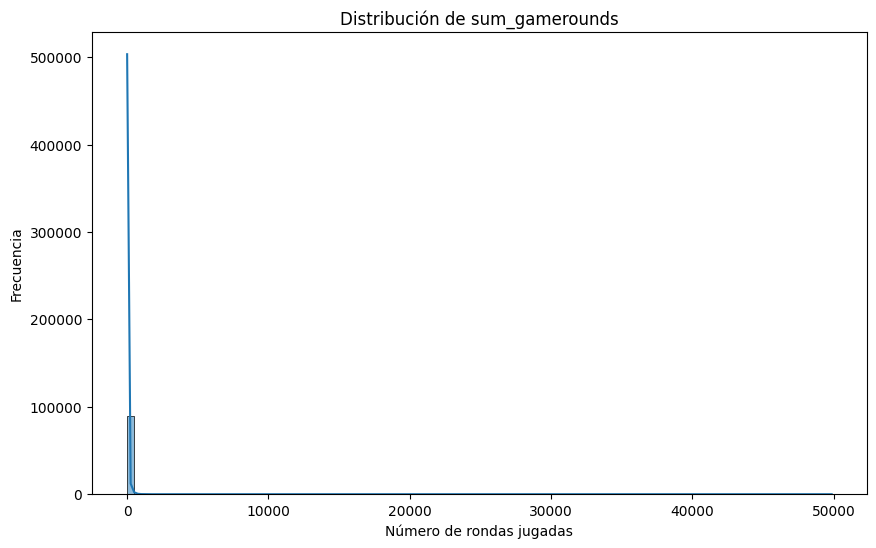

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sum_gamerounds'], bins=100, kde=True)
plt.title('Distribución de sum_gamerounds')
plt.xlabel('Número de rondas jugadas')
plt.ylabel('Frecuencia')
plt.show()

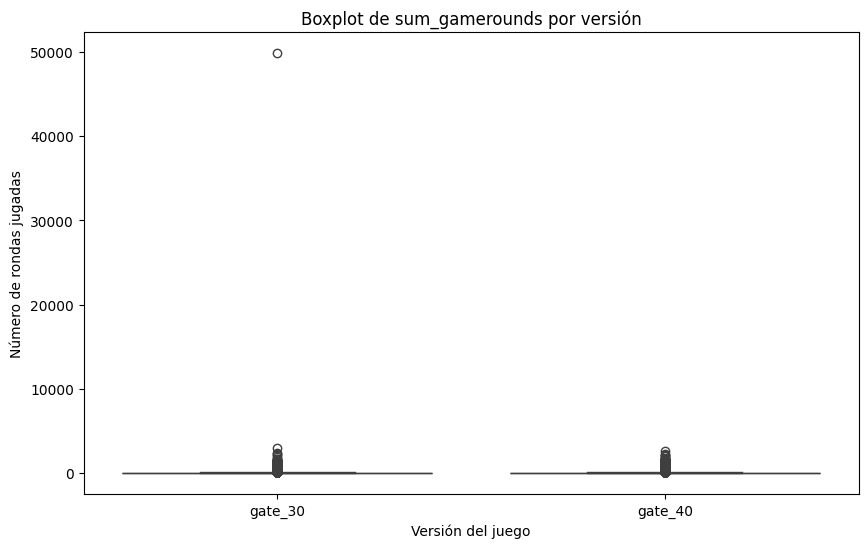

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='version', y='sum_gamerounds', data=df)
plt.title('Boxplot de sum_gamerounds por versión')
plt.xlabel('Versión del juego')
plt.ylabel('Número de rondas jugadas')
plt.show()

In [104]:
# 1. Identificar los valores atípicos

# Calcular los cuartiles Q1 y Q3
Q1 = df['sum_gamerounds'].quantile(0.25)
Q3 = df['sum_gamerounds'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites inferior y superior para identificar los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. Eliminar los valores atípicos

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df = df[(df['sum_gamerounds'] >= lower_bound) & (df['sum_gamerounds'] <= upper_bound)]

In [105]:
df['sum_gamerounds_log'] = np.log1p(df['sum_gamerounds'])  # Transformación logarítmica

#### Transformacion de variables

In [106]:
df['version'] = df['version'].replace({'gate_30': 3, 'gate_40': 4})
df['version'] = df['version'].infer_objects()

C:\Users\enrique\AppData\Local\Temp\ipykernel_2008\2346902854.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['version'] = df['version'].replace({'gate_30': 3, 'gate_40': 4})


In [107]:
df['userid'].duplicated().sum()

np.int64(0)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80012 entries, 0 to 90188
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userid              80012 non-null  int64  
 1   version             80012 non-null  int64  
 2   sum_gamerounds      80012 non-null  int64  
 3   retention_1         80012 non-null  bool   
 4   retention_7         80012 non-null  bool   
 5   sum_gamerounds_log  80012 non-null  float64
dtypes: bool(2), float64(1), int64(3)
memory usage: 3.2 MB


In [109]:
df.describe()

,userid,version,sum_gamerounds,sum_gamerounds_log
count,8.001200e+04,80012.000000,80012.000000,80012.000000
mean,4.995057e+06,3.504599,23.979178,2.554108
std,2.882081e+06,0.499982,27.481366,1.255817
min,1.160000e+02,3.000000,0.000000,0.000000
25%,2.510432e+06,3.000000,4.000000,1.609438
50%,4.995187e+06,4.000000,13.000000,2.639057
75%,7.490705e+06,4.000000,34.000000,3.555348
max,9.999861e+06,4.000000,120.000000,4.795791


## analisis EDA

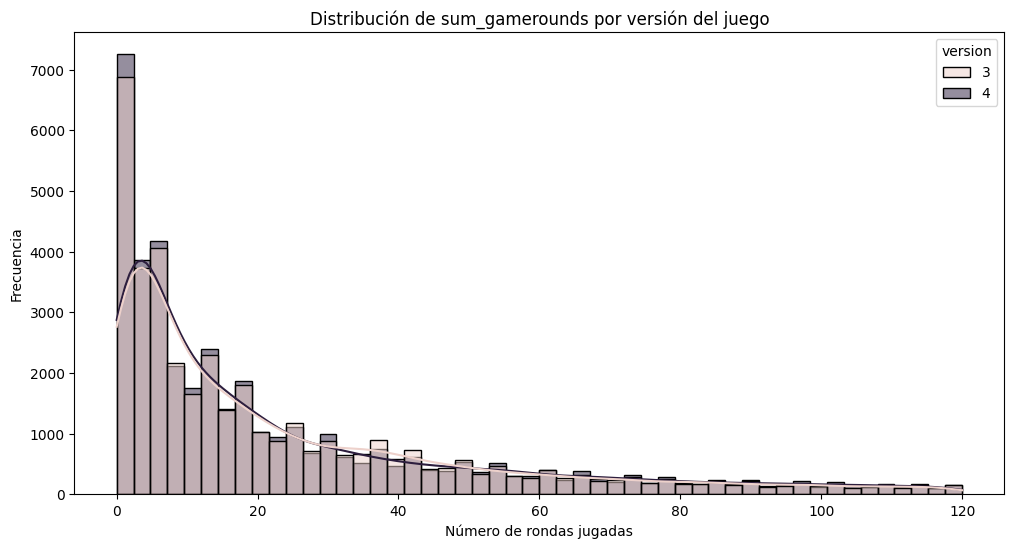

In [110]:
# 1. Histogramas de sum_gamerounds por versión del juego
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='sum_gamerounds', hue='version', bins=50, kde=True)
plt.title('Distribución de sum_gamerounds por versión del juego')
plt.xlabel('Número de rondas jugadas')
plt.ylabel('Frecuencia')
plt.show()

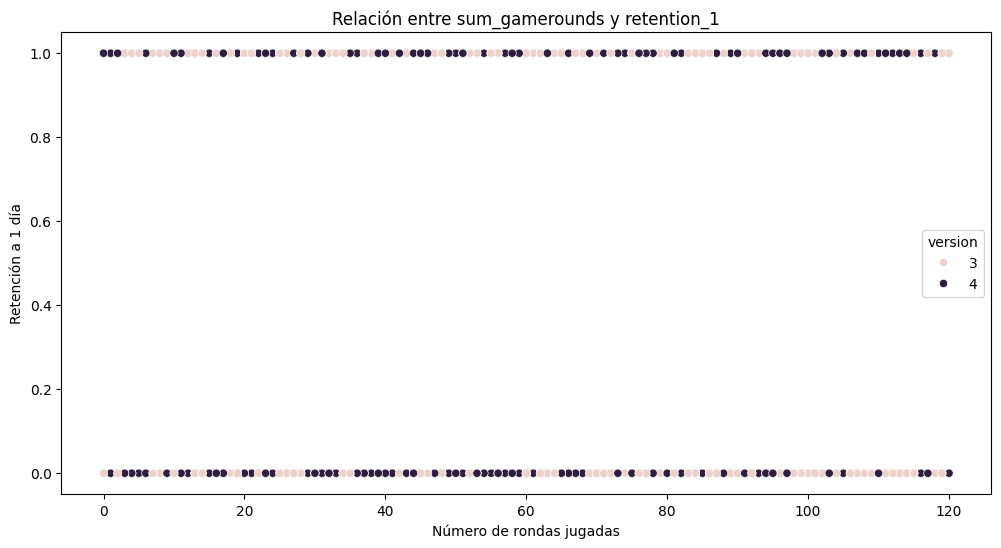

In [111]:
# 2. Diagramas de dispersión de sum_gamerounds vs. retención
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='sum_gamerounds', y='retention_1', hue='version')
plt.title('Relación entre sum_gamerounds y retention_1')
plt.xlabel('Número de rondas jugadas')
plt.ylabel('Retención a 1 día')
plt.show()

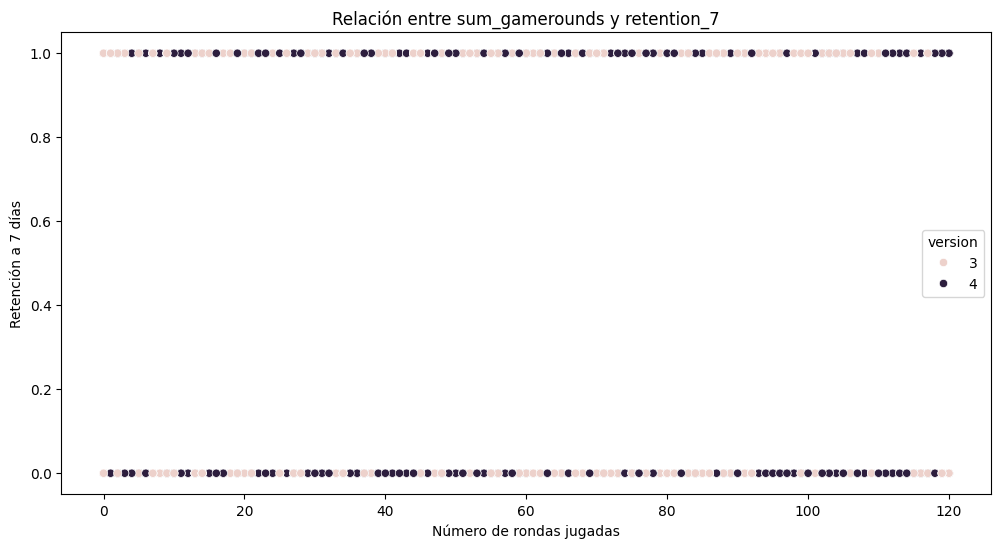

In [112]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='sum_gamerounds', y='retention_7', hue='version')
plt.title('Relación entre sum_gamerounds y retention_7')
plt.xlabel('Número de rondas jugadas')
plt.ylabel('Retención a 7 días')
plt.show()

In [113]:
# 3. Gráficos de barras de retención por versión del juego
retention_1_by_version = df.groupby('version')['retention_1'].mean()
retention_7_by_version = df.groupby('version')['retention_7'].mean()

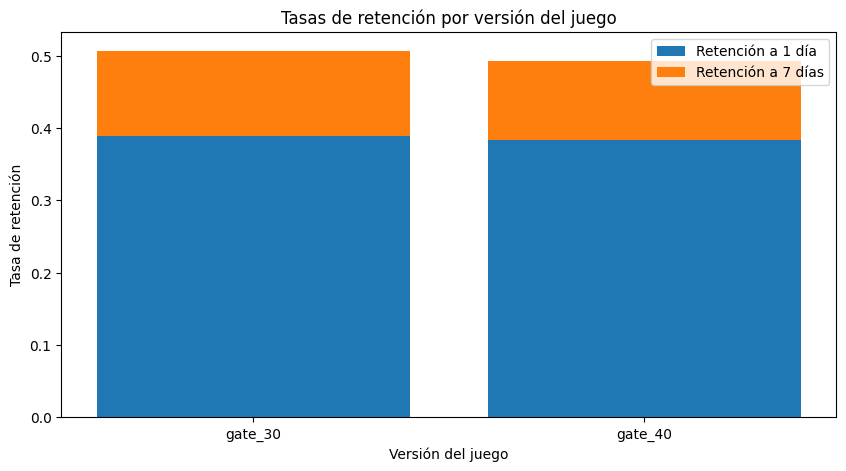

In [114]:
plt.figure(figsize=(10, 5))
plt.bar(retention_1_by_version.index, retention_1_by_version.values, label='Retención a 1 día')
plt.bar(retention_7_by_version.index, retention_7_by_version.values, label='Retención a 7 días', bottom=retention_1_by_version.values)
plt.xticks(retention_1_by_version.index, ['gate_30', 'gate_40'])
plt.title('Tasas de retención por versión del juego')
plt.xlabel('Versión del juego')
plt.ylabel('Tasa de retención')
plt.legend()
plt.show()

Diagnóstico:
- Distribución más clara: El histograma muestra una distribución más definida, con la mayoría de los jugadores concentrados en un rango de 0 a 40 rondas. Se aprecia mejor la forma de la distribución y la posible presencia de dos modas.
- Relaciones más visibles: En los diagramas de dispersión, aunque la relación entre sum_gamerounds and la retención sigue siendo débil, se pueden apreciar mejor algunos patrones. Parece haber una mayor densidad de puntos con alta retención a medida que aumenta el número de rondas jugadas.
- Tasas de retención similares: El gráfico de barras sigue mostrando tasas de retención similares entre las dos versiones del juego.

In [115]:
# 1. Estadísticas descriptivas por grupo
df.groupby('version')['sum_gamerounds'].agg(['mean', 'median', 'std', 'min', 'max'])

,mean,median,std,min,max
version,,,,,
3,23.945179,13.0,27.152547,0,120
4,24.012558,13.0,27.800704,0,120


In [116]:
# 2. Tasas de retención por grupo
df.groupby('version').agg({'retention_1': 'mean', 'retention_7': 'mean'})

,retention_1,retention_7
version,,
3,0.389096,0.118119
4,0.383366,0.109798


In [117]:
# 3. Tabla pivote
pivot_table = df.pivot_table(values=['sum_gamerounds', 'retention_1', 'retention_7'], index='version', aggfunc={'sum_gamerounds': 'mean', 'retention_1': 'mean', 'retention_7': 'mean'})
pivot_table

,retention_1,retention_7,sum_gamerounds
version,,,
3,0.389096,0.118119,23.945179
4,0.383366,0.109798,24.012558


## hipotesis
- H0 (hipótesis nula): No hay diferencia significativa en el número medio de rondas jugadas (sum_gamerounds) entre los jugadores que experimentan gate_30 y los que experimentan gate_40.
- H1 (hipótesis alternativa): El número medio de rondas jugadas (sum_gamerounds) es diferente entre los jugadores que experimentan gate_30 y los que experimentan gate_40.

In [118]:
from scipy.stats import shapiro
shapiro(df[df['version'] == 3]['sum_gamerounds'])  # Para gate_30
shapiro(df[df['version'] == 4]['sum_gamerounds'])  # Para gate_40

E:\python\statistical Analysis\.venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 39638.
  res = hypotest_fun_out(*samples, **kwds)
E:\python\statistical Analysis\.venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40374.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.7920260035723027), pvalue=np.float64(5.564802533641124e-111))

In [119]:
from scipy.stats import levene
levene(df[df['version'] == 3]['sum_gamerounds'], df[df['version'] == 4]['sum_gamerounds'])

LeveneResult(statistic=np.float64(2.4066151181530264), pvalue=np.float64(0.12082732122564133))

In [120]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df[df['version'] == 3]['sum_gamerounds'], df[df['version'] == 4]['sum_gamerounds'])
print(f"Estadística t: {t_stat}")
print(f"Valor p: {p_value}")

Estadística t: -0.3467458127838215
Valor p: 0.7287832012343212


#### Prueba de Shapiro-Wilk:
- Para ambos grupos (gate_30 y gate_40), el valor p es extremadamente pequeño (aunque no se muestra el valor exacto, el warning indica que es muy pequeño). Esto sugiere que no se cumple el supuesto de normalidad.
#### Prueba de Levene:
- El valor p es 0.53, que es mayor que 0.05. Esto indica que se sigue cumpliendo el supuesto de homogeneidad de varianzas después de la transformación logarítmica.
#### Prueba t independiente:
- El valor p es 0.72, que sigue siendo mayor que 0.05. Esto indica que, incluso después de la transformación, no hay evidencia suficiente para rechazar la hipótesis nula. No hay una diferencia significativa en el número medio de rondas jugadas (transformadas logarítmicamente) entre las dos versiones del juego.
#### Conclusión:
- Tanto con los datos originales como con la transformación logarítmica, llegamos a la misma conclusión: no hay evidencia suficiente para afirmar que hay una diferencia significativa en el número de rondas jugadas entre las dos versiones del juego.